<a href="https://colab.research.google.com/github/gopalachennakesavareddy/Multimodal-Explqinable-AI-for-detection-lung-detection-using-deep-neural-network/blob/main/Copy_of_Untitled26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Lung.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Normal/NORMAL2-IM-0673-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0675-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0678-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0680-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0682-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0683-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0684-0001-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0686-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0690-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0692-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0693-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0695-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0698-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0699-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0702-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0705-0001.jpeg  
  inflating: train/Normal/NORMAL2-IM-0707-0001.jpeg  
  inflating: train/Normal/

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report
import time
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
import os
directory = '/content/train'

def explore_directory(directory):
    if not os.path.exists(directory):
        print(f"The directory {directory} does not exist.")
        return
    print(f"Exploring contents of: {directory}\n")
    num_dirs = 0
    num_files = 0
    dir_details = []
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            num_dirs += 1
            num_files_in_dir = len([f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))])
            dir_details.append((item, num_files_in_dir))
        elif os.path.isfile(item_path):
            num_files += 1
    print(f"Summary:\n- Total directories: {num_dirs}\n- Total files: {num_files}\n")
    if dir_details:
        print("Directory details:")
        for dir_name, file_count in dir_details:
            print(f"  - {dir_name}: {file_count} files")
    else:
        print("No subdirectories found.")

    root_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    if root_files:
        print("\nFiles in the root directory:")
        for file in root_files:
            print(f"  - {file}")

explore_directory(directory)

Exploring contents of: /content/train

Summary:
- Total directories: 5
- Total files: 0

Directory details:
  - Corona Virus Disease: 1218 files
  - Normal: 1207 files
  - Bacterial Pneumonia: 1205 files
  - Viral Pneumonia: 1204 files
  - Tuberculosis: 1220 files


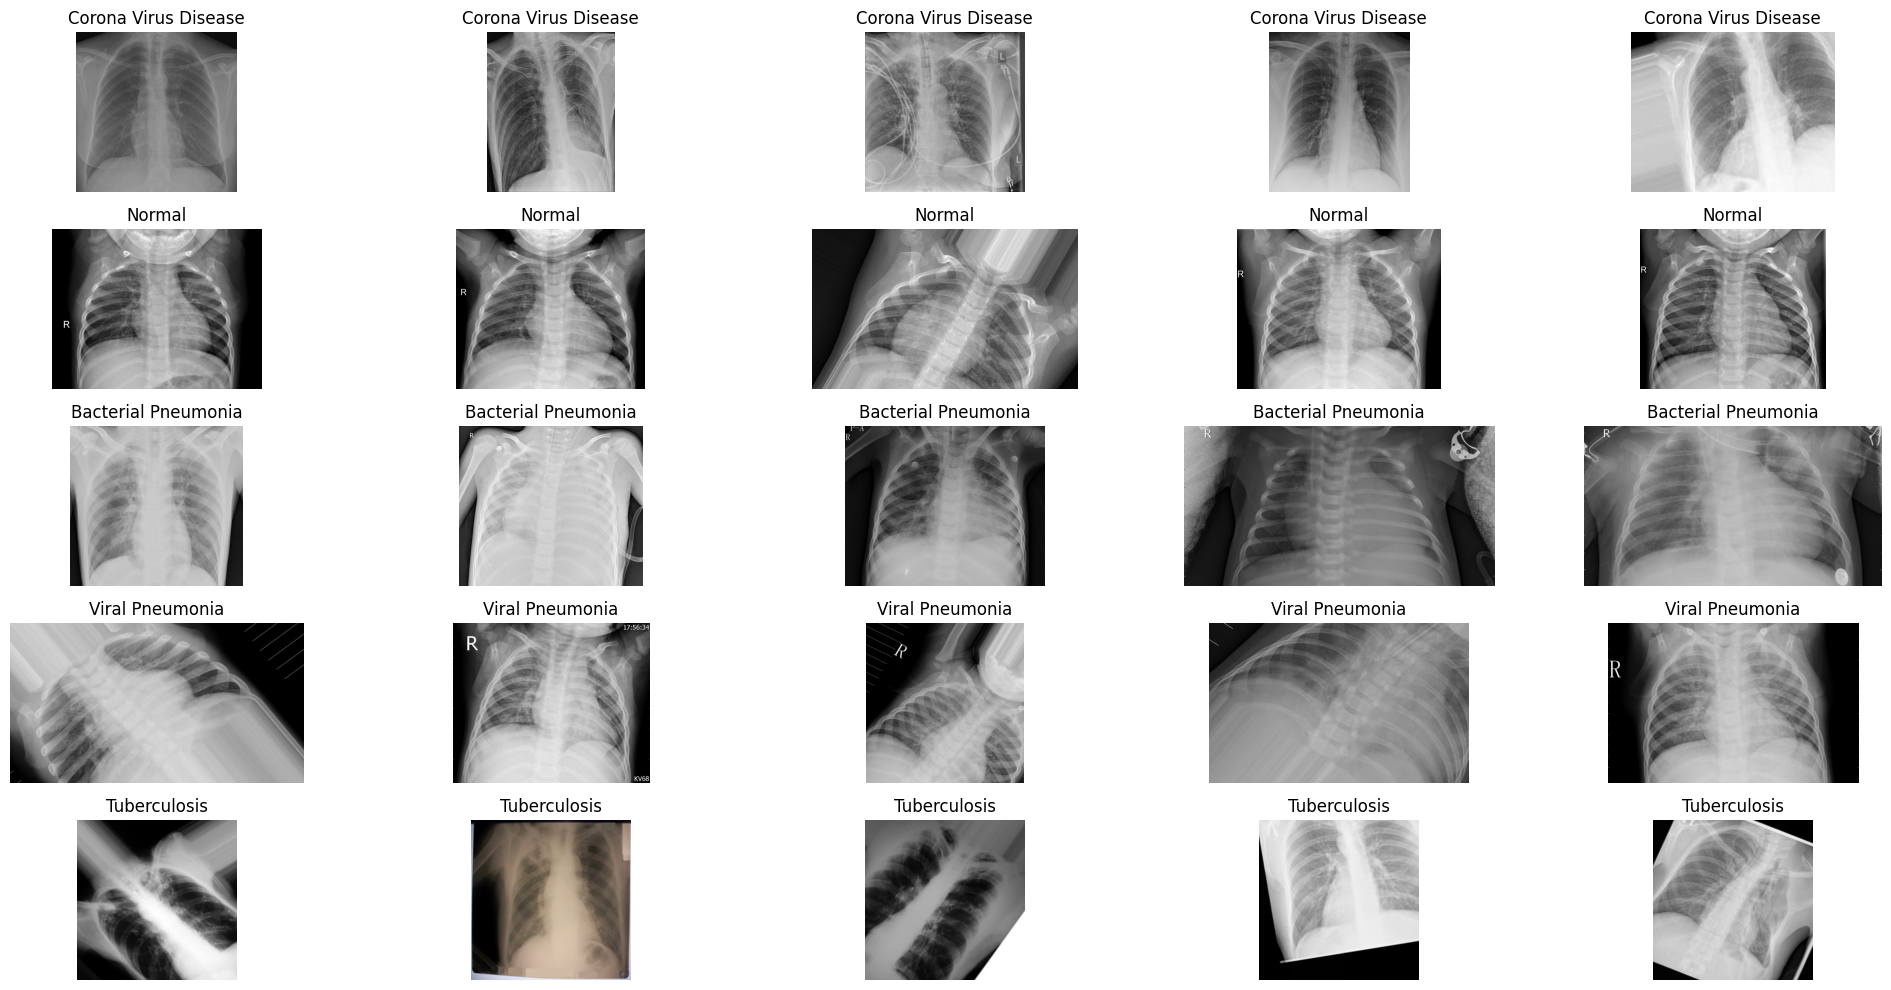

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2


image_dir = "/content/train"
classes = os.listdir(image_dir)
num_classes = len(classes)
images_per_class = 5
plt.figure(figsize=(20, 10))

for i, class_name in enumerate(classes):
    class_path = os.path.join(image_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))][:images_per_class]

    for j, image_file in enumerate(image_files):
        image_path = os.path.join(class_path, image_file)
        img = cv2.imread(image_path)
        if img is not None:  # Check if the image was loaded successfully
          plt.subplot(num_classes, images_per_class, i * images_per_class + j + 1)
          plt.imshow(img)
          plt.title(f"{class_name}")
          plt.axis('off')
        else:
          print(f"Error loading image: {image_path}")

plt.tight_layout()
plt.show()

In [ ]:
image_size = (240, 240)
batch_size = 32
num_epochs = 150
image_input = Input(shape=(240, 240, 3))
# https://storage.googleapis.com/keras-applications/efficientnetb1_notop.h5 (This line is a comment and not executable code)

In [ ]:
efficientnet_model = EfficientNetB1(weights='imagenet', include_top=False, input_tensor=image_input)

x = efficientnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=image_input, outputs=output)

27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.applications.densenet import preprocess_input
optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
train_dataset = train_datagen.flow_from_directory(
    '/content/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
val_dataset = val_datagen.flow_from_directory(
    '/content/val',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=val_dataset,
    callbacks=[lr_scheduler, early_stopping]
)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.7291 - loss: 0.7113 - val_accuracy: 0.2034 - val_loss: 9.8776 - learning_rate: 0.0010
Epoch 2/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 160s 842ms/step - accuracy: 0.8402 - loss: 0.4188 - val_accuracy: 0.1721 - val_loss: 2.2646 - learning_rate: 0.0010
Epoch 3/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 162s 854ms/step - accuracy: 0.8503 - loss: 0.3819 - val_accuracy: 0.4802 - val_loss: 1.2584 - learning_rate: 0.0010
Epoch 4/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 162s 855ms/step - accuracy: 0.8713 - loss: 0.3317 - val_accuracy: 0.6811 - val_loss: 0.7719 - learning_rate: 0.0010
Epoch 5/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 159s 838ms/step - accuracy: 0.8727 - loss: 0.3206 - val_accuracy: 0.7416 - val_loss: 0.6504 - learning_rate: 0.0010
Epoch 6/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 156s 823ms/step - accuracy: 0.8820 - loss: 0.3009 - val_accuracy: 0.3016 - val_loss: 2.6994 - learning_rate: 0.0010
Epoch 7/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 162s 852ms/step - ac

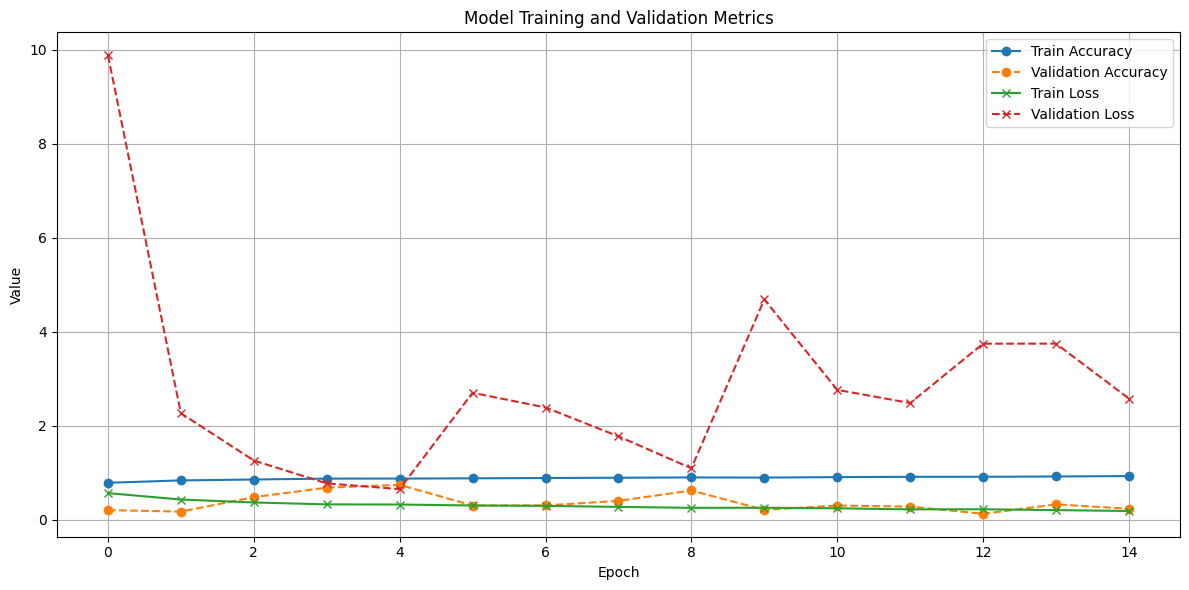

In [ ]:
import matplotlib.pyplot as plt

def plot_combined_history(history):
    plt.figure(figsize=(12, 6))

    plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='-', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='o')
    plt.plot(history.history['loss'], label='Train Loss', linestyle='-', marker='x')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')

    plt.title('Model Training and Validation Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot combined metrics
plot_combined_history(history)

In [ ]:
atest_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_dataset = atest_datagen.flow_from_directory(
    '/content/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2025 images belonging to 5 classes.


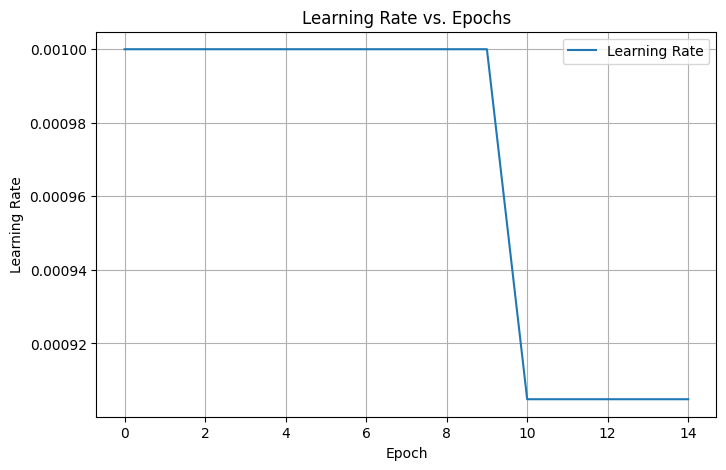

In [ ]:
def plot_learning_rate(history, scheduler_fn):
    epochs = range(len(history.history['loss']))
    lr = [scheduler_fn(epoch, 0.001) for epoch in epochs]  # Adjust initial learning rate if needed

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, lr, label='Learning Rate')
    plt.title('Learning Rate vs. Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Example usage
plot_learning_rate(history, scheduler)

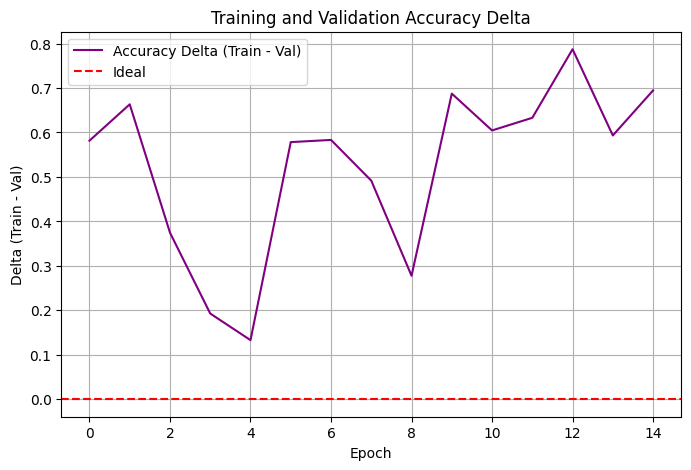

In [ ]:
def plot_accuracy_delta(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    delta = [train - val for train, val in zip(train_accuracy, val_accuracy)]

    plt.figure(figsize=(8, 5))
    plt.plot(delta, label='Accuracy Delta (Train - Val)', color='purple')
    plt.axhline(y=0, color='r', linestyle='--', label='Ideal')
    plt.title('Training and Validation Accuracy Delta')
    plt.xlabel('Epoch')
    plt.ylabel('Delta (Train - Val)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Use this to analyze generalization.
plot_accuracy_delta(history)

In [ ]:
start_time = time.time()
evaluation_result = model.evaluate(test_dataset)
print("Time taken to evaluate the model: " + str(time.time() - start_time))

print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

y_pred = model.predict(test_dataset)
y_pred_bool = np.argmax(y_pred, axis=1)

true_labels = test_dataset.labels

print(classification_report(true_labels, y_pred_bool, digits=4))

np.savetxt("y_true.txt", true_labels, fmt="%d")
np.savetxt("y_pred.txt", y_pred_bool, fmt="%d")

64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 440ms/step - accuracy: 0.6263 - loss: 0.7194
Time taken to evaluate the model: 41.10565757751465
Test Loss: 0.5759590864181519
Test Accuracy: 0.7639506459236145
64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 454ms/step
              precision    recall  f1-score   support

           0     0.8333    0.3846    0.5263       403
           1     0.7143    0.9828    0.8273       407
           2     0.9530    0.8540    0.9008       404
           3     0.9074    0.8407    0.8728       408
           4     0.5640    0.7543    0.6454       403

    accuracy                         0.7640      2025
   macro avg     0.7944    0.7633    0.7545      2025
weighted avg     0.7946    0.7640    0.7550      2025



64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step
Overall Accuracy: 76.40%


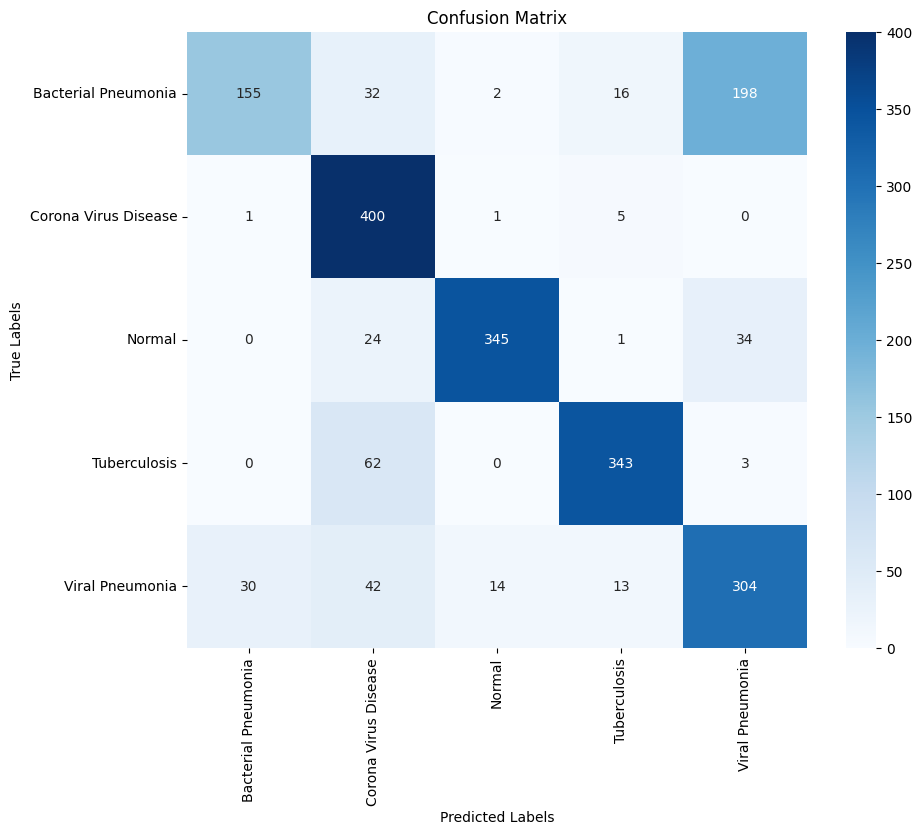

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict labels for test data
y_pred = model.predict(test_dataset)
y_pred_bool = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Extract true labels from the test dataset
rounded_labels = test_dataset.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(rounded_labels, y_pred_bool)

# Overall Accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f'Overall Accuracy: {accuracy*100:.2f}%')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_indices.keys(), yticklabels=test_dataset.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step


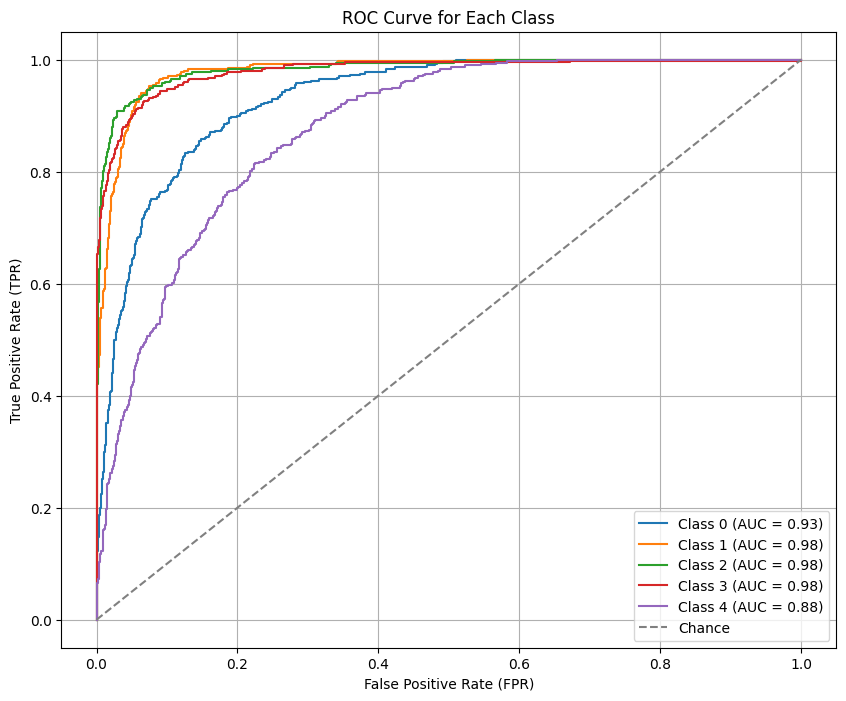

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve(model, val_dataset):
    # Get ground truth and predictions
    y_true = label_binarize(val_dataset.classes, classes=range(5))
    y_pred = model.predict(val_dataset)

    plt.figure(figsize=(10, 8))
    for i in range(y_true.shape[1]):  # One curve per class
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')

    plt.title('ROC Curve for Each Class')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_roc_curve(model, val_dataset)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 240, 240, 3))
  warnings.warn(msg)
<ipython-input-17-f9d5fb787867>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = plt.cm.get_cmap("jet")


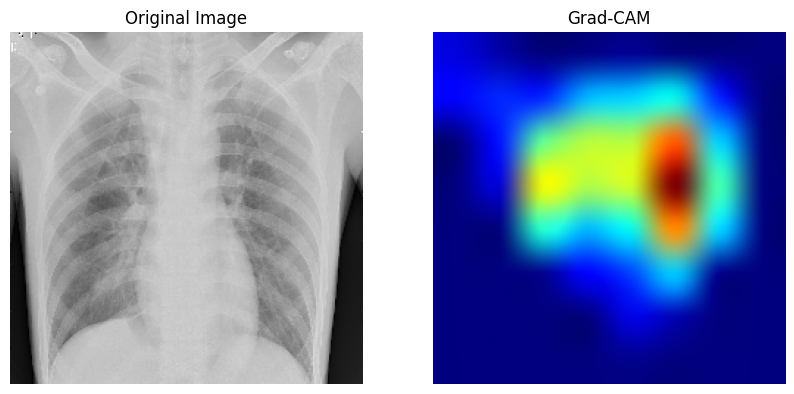

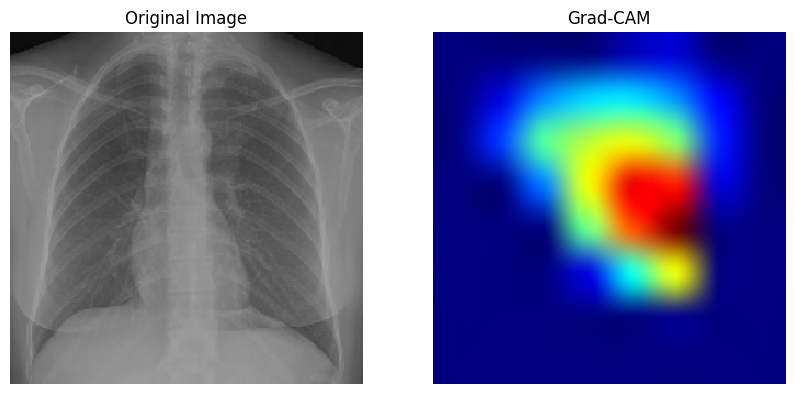

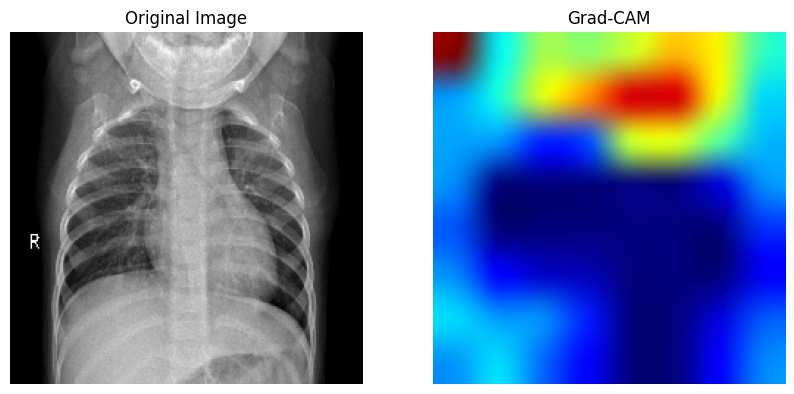

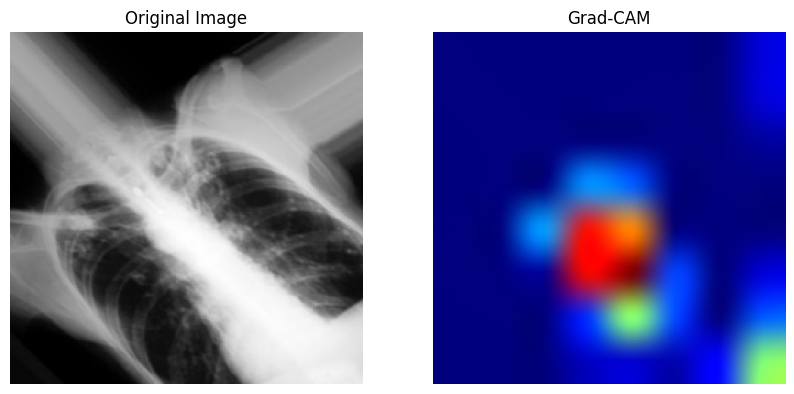

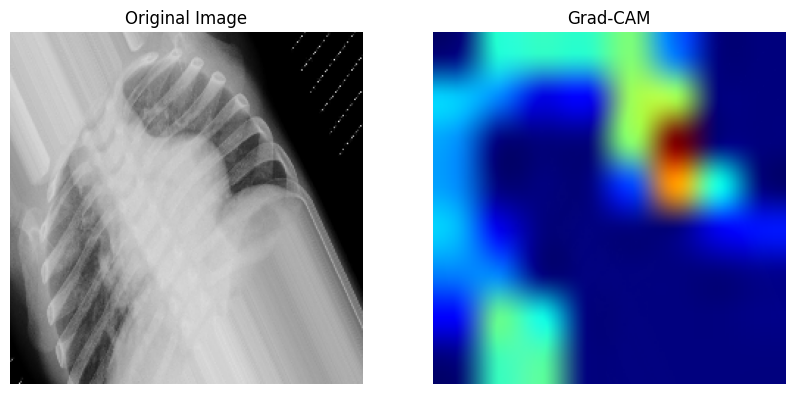

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from skimage.segmentation import mark_boundaries

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img, heatmap, alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = plt.cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

# Example usage for one image from each class
class_names = list(train_dataset.class_indices.keys())
last_conv_layer_name = "top_conv"  # For EfficientNetB1, this might need adjustment

for class_name in class_names:
    # Get first image from the class
    class_dir = os.path.join('/content/train', class_name)
    img_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Generate heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Display
    display_gradcam(tf.keras.preprocessing.image.img_to_array(img)/255., heatmap)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0147d13bf97e25b0293a9e9662c6171210ce08d8b21d56d1f5a0b63e6e3ac652
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━

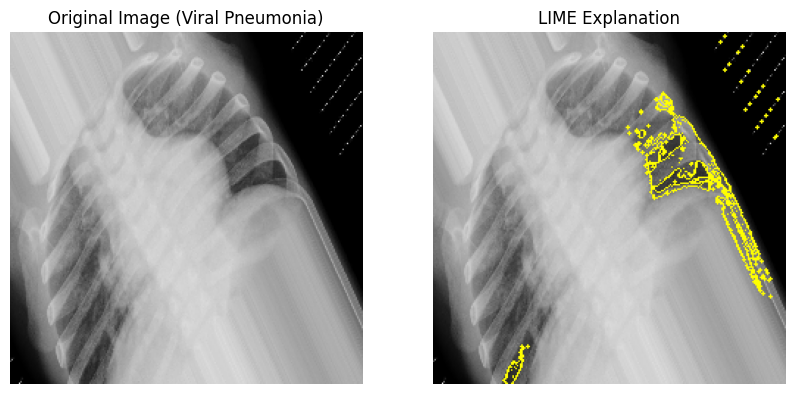

In [ ]:
!pip install lime
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

def predict_fn(images):
    # Preprocess images for EfficientNet
    processed_images = preprocess_input(images.copy())
    return model.predict(processed_images)

# Create explainer
explainer = lime_image.LimeImageExplainer()

# Example for one image per class
for class_name in class_names:
    # Get first image from the class
    class_dir = os.path.join('/content/train', class_name)
    img_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    # Load image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Explain the prediction
    explanation = explainer.explain_instance(
        img.astype('double'),
        predict_fn,
        top_labels=5,
        hide_color=0,
        num_samples=1000
    )
temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
        )

    # Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img/255.)
plt.title(f'Original Image ({class_name})')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp/255., mask))
plt.title('LIME Explanation')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

  0%|          | 0/498 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


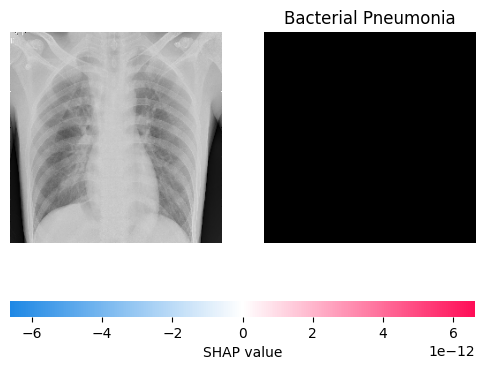

In [ ]:
!pip install shap --upgrade
import shap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1. Load a single sample image
def load_sample_image():
    # Get first image from first class
    class_name = list(train_dataset.class_indices.keys())[0]
    class_dir = os.path.join('/content/train', class_name)
    img_file = os.listdir(class_dir)[0]
    img_path = os.path.join(class_dir, img_file)
    img = load_img(img_path, target_size=image_size)
    return img_to_array(img)

sample_image = load_sample_image()

# 2. Define proper prediction function
def predict_fn(imgs):
    if len(imgs.shape) == 3:
        imgs = np.expand_dims(imgs, 0)
    imgs_preprocessed = preprocess_input(imgs.copy())
    return model.predict(imgs_preprocessed)

# 3. Create background data (single black image)
background = np.zeros((1, *sample_image.shape))

# 4. Use the newer Explainer API instead of KernelExplainer
explainer = shap.Explainer(
    predict_fn,
    masker=shap.maskers.Image("blur(128,128)", sample_image.shape),
    algorithm="auto"  # Let SHAP choose the best algorithm
)

# 5. Compute SHAP values (may take 2-5 minutes)
shap_values = explainer(np.expand_dims(sample_image, 0))

# 6. Plot results
shap.image_plot(
    shap_values.values,
    sample_image[np.newaxis,:,:,:]/255.,
    labels=[list(train_dataset.class_indices.keys())]
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━

PartitionExplainer explainer: 2it [00:36, 36.24s/it]               


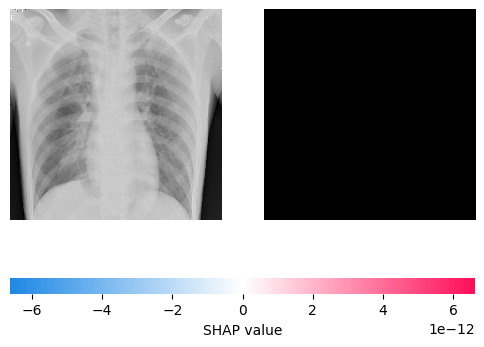

In [ ]:
import shap
import numpy as np

# 1. Select one test image
sample_image = test_images[0]  # Using first test image

# 2. Create explainer with blur masker
explainer = shap.Explainer(
    lambda x: model.predict(preprocess_input(x.copy())),
    masker=shap.maskers.Image("blur(128,128)", sample_image.shape)
)

# 3. Compute SHAP values (takes 1-3 minutes)
shap_values = explainer(np.expand_dims(sample_image, 0))

# 4. Plot
shap.image_plot(shap_values.values, sample_image[np.newaxis]/255.)